In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **IMDb Datasets**

Subsets of IMDb data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the [Non-Commercial Licensing](https://help.imdb.com/article/imdb/general-information/can-i-use-imdb-data-in-my-software/G5JTRESSHJBBHTGX?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;ref_=fea_mn_lk1) and [copyright/license](http://www.imdb.com/Copyright?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;ref_=fea_mn_lk2) and verify compliance.

**Data Location**

The dataset files can be accessed and downloaded from [https://datasets.imdbws.com/](https://www.imdb.com/offsite/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;page-action=offsite-imdbws&amp;token=BCYqjCgbxhvkkPZqvIDuKZraCiIzU4_zRcPbCXwwUCIaXN2hnfdasUG9HBE3n73r6wALAyCPfonV%0D%0Akjf8k3Y1O1CWQhCYs4XmdobRUcXM-h2JG2s4iVkTzfLrQlct2rDDA-5gFvg-dP5pawpBPca9hvEQ%0D%0AFWjS1McvWWO13OTSyme0m0cxC0-J6yvJ2RGGM75xTV1PQikR59ssSmGnEduhQksu4Q%0D%0A&amp;ref_=fea_mn_lk3). The data is refreshed daily.

**IMDb Dataset Details**

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A _&#39;\N&#39;_ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

**title.akas.tsv.gz** - Contains the following information for titles:

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: &quot;alternative&quot;, &quot;dvd&quot;, &quot;festival&quot;, &quot;tv&quot;, &quot;video&quot;, &quot;working&quot;, &quot;original&quot;, &quot;imdbDisplay&quot;. New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

**title.basics.tsv.gz** - Contains the following information for titles:

- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- riginalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. &#39;\N&#39; for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**title.crew.tsv.gz** – Contains the director and writer information for all the titles in IMDb. Fields include:

- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

**title.episode.tsv.gz** – Contains the tv episode information. Fields include:

- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

**title.principals.tsv.gz** – Contains the principal cast/crew for titles

- tconst (string) - alphanumeric unique identifier of the title
- rdering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else &#39;\N&#39;
- characters (string) - the name of the character played if applicable, else &#39;\N&#39;

**title.ratings.tsv.gz** – Contains the IMDb rating and votes information for titles

- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

**name.basics.tsv.gz** – Contains the following information for names:

- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else &#39;\N&#39;
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

#### Читаем данные из файла и отделяем фильмы с названием на "US" от фильмов с названиями на других языках и удаляем дубликаты по полю 'titleId'.

In [2]:
data_title_akas_tsv = pd.read_csv("./data/title.akas.tsv.gz", sep="\t", header=0, compression="gzip", low_memory=False)
data_us = data_title_akas_tsv[data_title_akas_tsv.region=="US"].copy()
data_us.drop_duplicates(subset ="titleId", keep = False, inplace = True)
data_NOT_us = data_title_akas_tsv[data_title_akas_tsv.region!="US"].copy()
data_NOT_us.drop_duplicates(subset ="titleId", keep = False, inplace = True)
del data_title_akas_tsv

#### Объединяем названия фильмов, таким образом чтобы сохранились все фильмы с названиями на "US" и добавились фильмы с названиями на других языках, но которых нет с названием на "US"

In [3]:
# Медленный способ, слишком долго ждать результат. Актуально только для небольших выборок
# data_both = pd.concat([data_us, data_NOT_us[~np.in1d(data_NOT_us['titleId'], data_us['titleId'])]], ignore_index=True)

# Быстрый способ. То что нужно.
data_title_akas = pd.concat([data_us, data_NOT_us]).drop_duplicates(subset='titleId', keep='first').reset_index(drop=True)
del data_us
del data_NOT_us

#### Загружаем дополнительные данные и объединяем их с имеющимися по полю "titleId"

In [4]:
data_title_basics_tsv = pd.read_csv("./data/title.basics.tsv.gz", sep="\t", header=0, compression="gzip")
data_title_basics_tsv.rename(columns={"tconst": "titleId"}, inplace=True)
more_data = pd.merge(data_title_akas, data_title_basics_tsv, on="titleId")
del data_title_akas
del data_title_basics_tsv

#### Загружаем данные с рейтингами и объединяем их с имеющимися данными по полю "titleId"

In [5]:
data_title_ratings_tsv = pd.read_csv("./data/title.ratings.tsv.gz", sep="\t", header=0, compression="gzip")
data_title_ratings_tsv.rename(columns={"tconst": "titleId"}, inplace=True)
full_data = pd.merge(more_data, data_title_ratings_tsv, on="titleId")
del more_data
del data_title_ratings_tsv

#### Так как предметом изучения в работе являются фильмы жанра "Комедия", отсечем остальные данные из датасэта

In [6]:
full_data = full_data[full_data.genres.str.contains("Comedy")]

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140600 entries, 12 to 479891
Data columns (total 18 columns):
titleId            140600 non-null object
ordering           140600 non-null int64
title              140600 non-null object
region             140600 non-null object
language           140600 non-null object
types              140600 non-null object
attributes         140600 non-null object
isOriginalTitle    140600 non-null object
titleType          140600 non-null object
primaryTitle       140600 non-null object
originalTitle      140600 non-null object
isAdult            140600 non-null int64
startYear          140600 non-null object
endYear            140600 non-null object
runtimeMinutes     140600 non-null object
genres             140600 non-null object
averageRating      140600 non-null float64
numVotes           140600 non-null int64
dtypes: float64(1), int64(3), object(14)
memory usage: 20.4+ MB


In [8]:
full_data = full_data[full_data.startYear!='\\N']

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140592 entries, 12 to 479891
Data columns (total 18 columns):
titleId            140592 non-null object
ordering           140592 non-null int64
title              140592 non-null object
region             140592 non-null object
language           140592 non-null object
types              140592 non-null object
attributes         140592 non-null object
isOriginalTitle    140592 non-null object
titleType          140592 non-null object
primaryTitle       140592 non-null object
originalTitle      140592 non-null object
isAdult            140592 non-null int64
startYear          140592 non-null object
endYear            140592 non-null object
runtimeMinutes     140592 non-null object
genres             140592 non-null object
averageRating      140592 non-null float64
numVotes           140592 non-null int64
dtypes: float64(1), int64(3), object(14)
memory usage: 20.4+ MB


In [10]:
full_data2 = full_data.copy()

In [11]:
full_data2.drop(columns=["ordering"], inplace=True)

In [12]:
full_data2.startYear = full_data2.startYear.astype(np.int64)

In [13]:
full_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140592 entries, 12 to 479891
Data columns (total 17 columns):
titleId            140592 non-null object
title              140592 non-null object
region             140592 non-null object
language           140592 non-null object
types              140592 non-null object
attributes         140592 non-null object
isOriginalTitle    140592 non-null object
titleType          140592 non-null object
primaryTitle       140592 non-null object
originalTitle      140592 non-null object
isAdult            140592 non-null int64
startYear          140592 non-null int64
endYear            140592 non-null object
runtimeMinutes     140592 non-null object
genres             140592 non-null object
averageRating      140592 non-null float64
numVotes           140592 non-null int64
dtypes: float64(1), int64(3), object(13)
memory usage: 19.3+ MB


In [14]:
full_data2 = full_data2[full_data2.titleType=="movie"]

In [15]:
full_data2[full_data2.startYear<=1990].averageRating.mean()

6.016669437978052

In [16]:
full_data2[full_data2.startYear>1990].averageRating.mean()

6.00966316356776

In [17]:
correlation = full_data2.corr(method='pearson')
columns = correlation.nlargest(10, 'averageRating').index
columns

Index(['averageRating', 'numVotes', 'startYear', 'isAdult'], dtype='object')

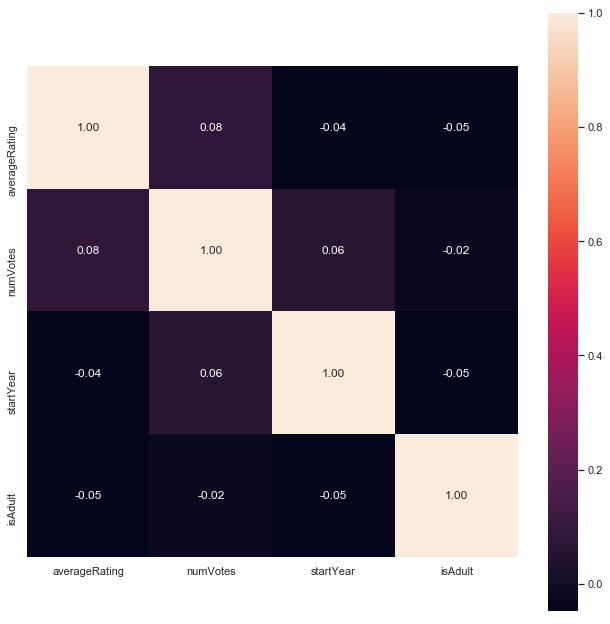

In [18]:

sns.set(rc={'figure.figsize':(11.,11.)})
correlation_map = np.corrcoef(full_data2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()